# k-means clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from kmeans import KMeans
from kmeans import elbow

### Data generation

** 4 blobs of random dots in 2D **
<br>
Note - k-means will delibarately be tasked to find 5 cluster to observe convergence issues and solutions

In [2]:
size = 100
# blob 1
x = np.random.normal(-4,2,(size))
y = np.random.normal(-12,3,(size))
# blob 2
x = np.concatenate((x,np.random.normal(0,1.5,(size))))
y = np.concatenate((y,np.random.normal(1,4,(size))))
# blob 3
x = np.concatenate((x,np.random.normal(-7,1,(size))))
y = np.concatenate((y,np.random.normal(4,2,(size))))
# blob 4
x = np.concatenate((x,np.random.normal(-5,0.4,(size))))
y = np.concatenate((y,np.random.normal(-3,0.8,(size))))

X = np.hstack((x[:,None],y[:,None]))

### Clustering
** Starting with random initialization **

In [3]:
# centroid initializer
km = KMeans(init='random')
# find clusters
km.fit(X,5)
# label data
y = km.predict(X)
# centroid coordinates
ks = km.centroids
# within cluster sum of squares metric
km.wcss(X)

2739.6908416778556

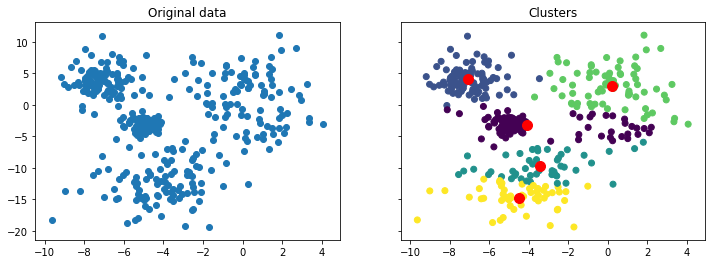

In [4]:
fig,axes = plt.subplots(ncols=2,figsize = (12,4),sharex=True,sharey=True)

axes[0].scatter(X[:,0],X[:,1])
axes[0].set_title('Original data')

axes[1].scatter(X[:,0],X[:,1],c=y)
axes[1].scatter(ks[:,0],ks[:,1],c='red',s=100)
axes[1].set_title('Clusters')

plt.show()

Notice sub-optimal solution (this issue is related to 'bad luck' on initiation)

** Solution: run several times and choose the best solution, based on wcss **

In [5]:
# run same Kmeans object 3 times, choose best clustering
km.iterate(X,5,3)
y = km.predict(X)
ks = km.centroids
km.wcss(X)

2336.0705598905465

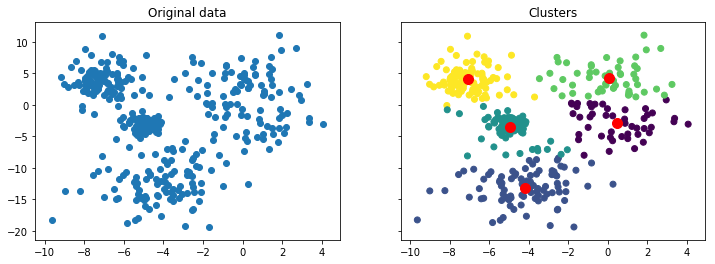

In [6]:
fig,axes = plt.subplots(ncols=2,figsize = (12,4),sharex=True,sharey=True)

axes[0].scatter(X[:,0],X[:,1])
axes[0].set_title('Original data')

axes[1].scatter(X[:,0],X[:,1],c=y)
axes[1].scatter(ks[:,0],ks[:,1],c='red',s=100)
axes[1].set_title('Clusters')

plt.show()

### K-means++
** A better solution **
<br>
K-means++ converges faster and is less likely to provide 'bad' clustering

In [7]:
# centroid initializer is kmeans++ (also default)
km = KMeans(init='kmeans++')
# single interation
km.fit(X,5)
y = km.predict(X)
ks = km.centroids
km.wcss(X)

2336.0705598905465

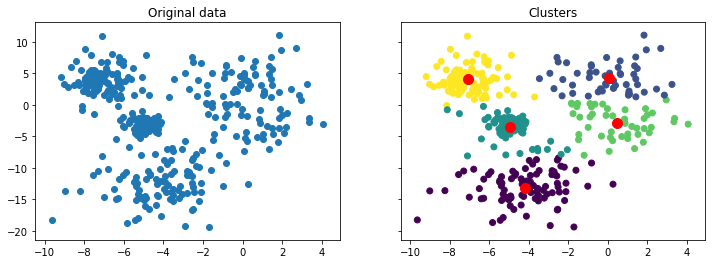

In [8]:
fig,axes = plt.subplots(ncols=2,figsize = (12,4),sharex=True,sharey=True)

axes[0].scatter(X[:,0],X[:,1])
axes[0].set_title('Original data')

axes[1].scatter(X[:,0],X[:,1],c=y)
axes[1].scatter(ks[:,0],ks[:,1],c='red',s=100)
axes[1].set_title('Clusters')

plt.show()

Notice that a fairly good solution is found within 1 iteration

### Elbow method
** Method for finding 'best' k **
<br>
Plot wcss as a function of k, and choose the k where wcss stops decreasing alot

Note: the quality of elbow method results is debatable, as exemplified below

In [9]:
a,b = elbow(X,km,8)

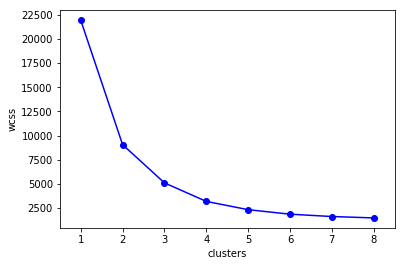

In [10]:
plt.plot(a,b,'-bo')
plt.xlim(0.5,8.5)
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()

** We know k=4 is the correct answer, but interpretation of this plot appears very subjective **